# Set Up Environment

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas import tseries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import tseries
from pandas.core import datetools

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  # Remove the CWD from sys.path while we load stuff.


# Load in the Data set

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data

TypeError: __new__() got an unexpected keyword argument 'format'

# Perpare the Data for Time Series Analysis

In [19]:
# The 'MS' string groups the data in buckets by start of the month, averaging the CO2 value for 
# the whole month and assigning that value to the month start date.
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before to fill in missing values, assigning the
#average CO2 value to the month start date.
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.400000


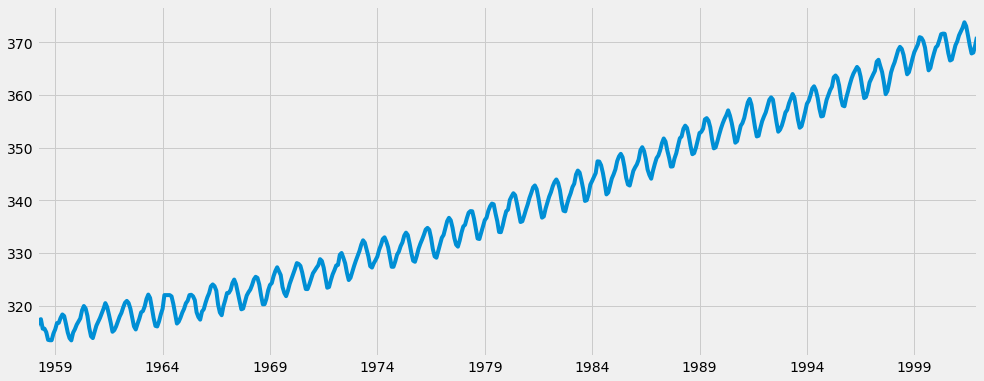

In [20]:
y.plot(figsize = (15, 6))
plt.show()

In [21]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal,
                                            enforce_stationarity = False, 
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

## the outcome prints the particular model with its AIC value. The 'best' model is the one with
## the lowest AIC value with respect to the rest of the model AIC values.

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624045514
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763955
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878469210077
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978075545
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912707444
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755626609
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327451488
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067396783
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716778884
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1088.9948875850123
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:814.4118150843135
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893617242
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988219801
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194082
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.7938546075724
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055303
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283760172
ARIM

In [23]:
mod = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12),
                                enforce_stationarity = False, enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3181      0.092      3.441      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.806      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


In the table above, the coef column represents the weighting of each variable and how it affects the time series.
The P>|z| column gives the p-value for the significance of the variable, with a value of <= 0.05 meaning that the effect of the variable is statistically significant on the time series.

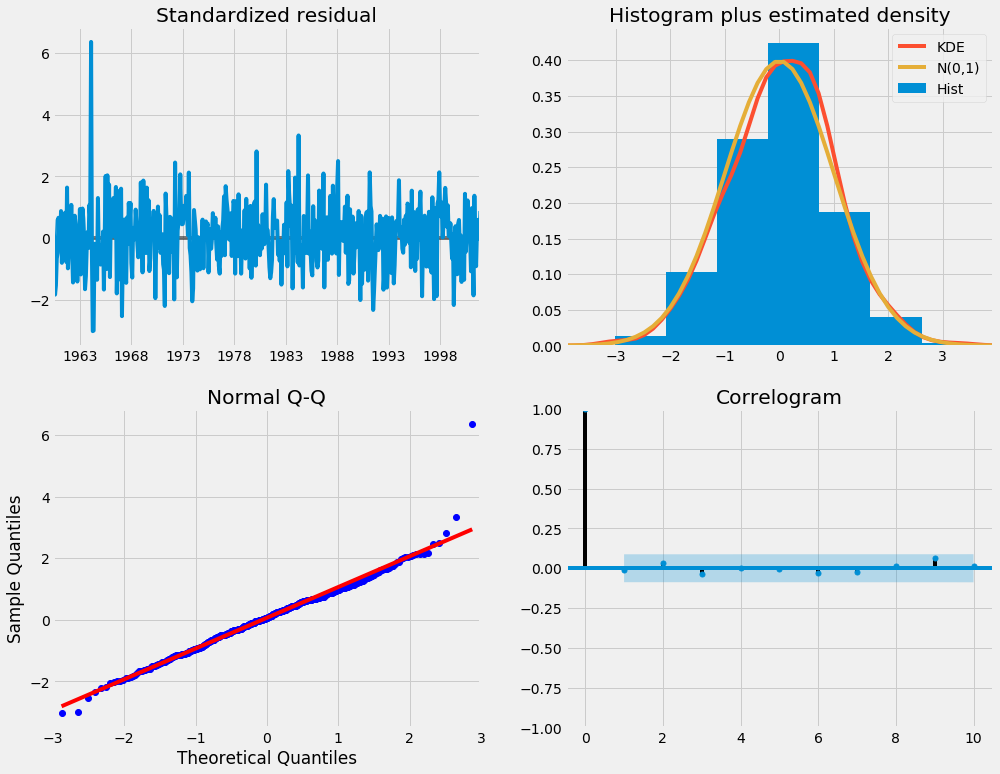

In [24]:
results.plot_diagnostics(figsize = (15, 12))
plt.show()

The top two plots above are used to test the mean and variance of the residuals. The residuals should be distributed normally with zero mean and unit variance. The closer the KDE line in the top-right graph to the red line denoting a normal (0,1) distribution the better the residuals are.
The bottom-left plot compares the ordered distribution of the residuals (blue dots) against the sample of a N(0,1) distribution (red line). The closer the dots are to the red line, the closer the residuals reflect a N(0,1) distribution.
The top-left and bottom-right graphs show if there is any seasonal variance in the rediduals and if they are correlated with lagged versions of themselves. If the lines fall within the light blue shaded region then there is no correlation to consider.

In [25]:
pred = results.get_prediction(start = pd.to_datetime('1998-01-01'), dynamic = False)
pred_ci = pred.conf_int()

The dynamic=False argument ensures that the predictions are one step ahead, meaning that the forecast at each point are generated using the full history up to that point.

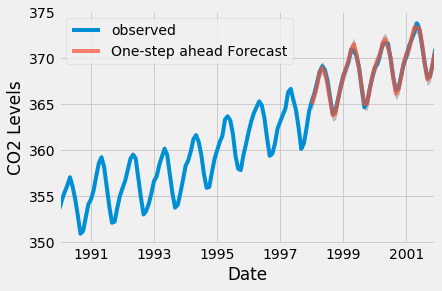

In [26]:
ax = y['1990':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [27]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [28]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic = True, full_results = True)
pred_dynamic_ci = pred_dynamic.conf_int()

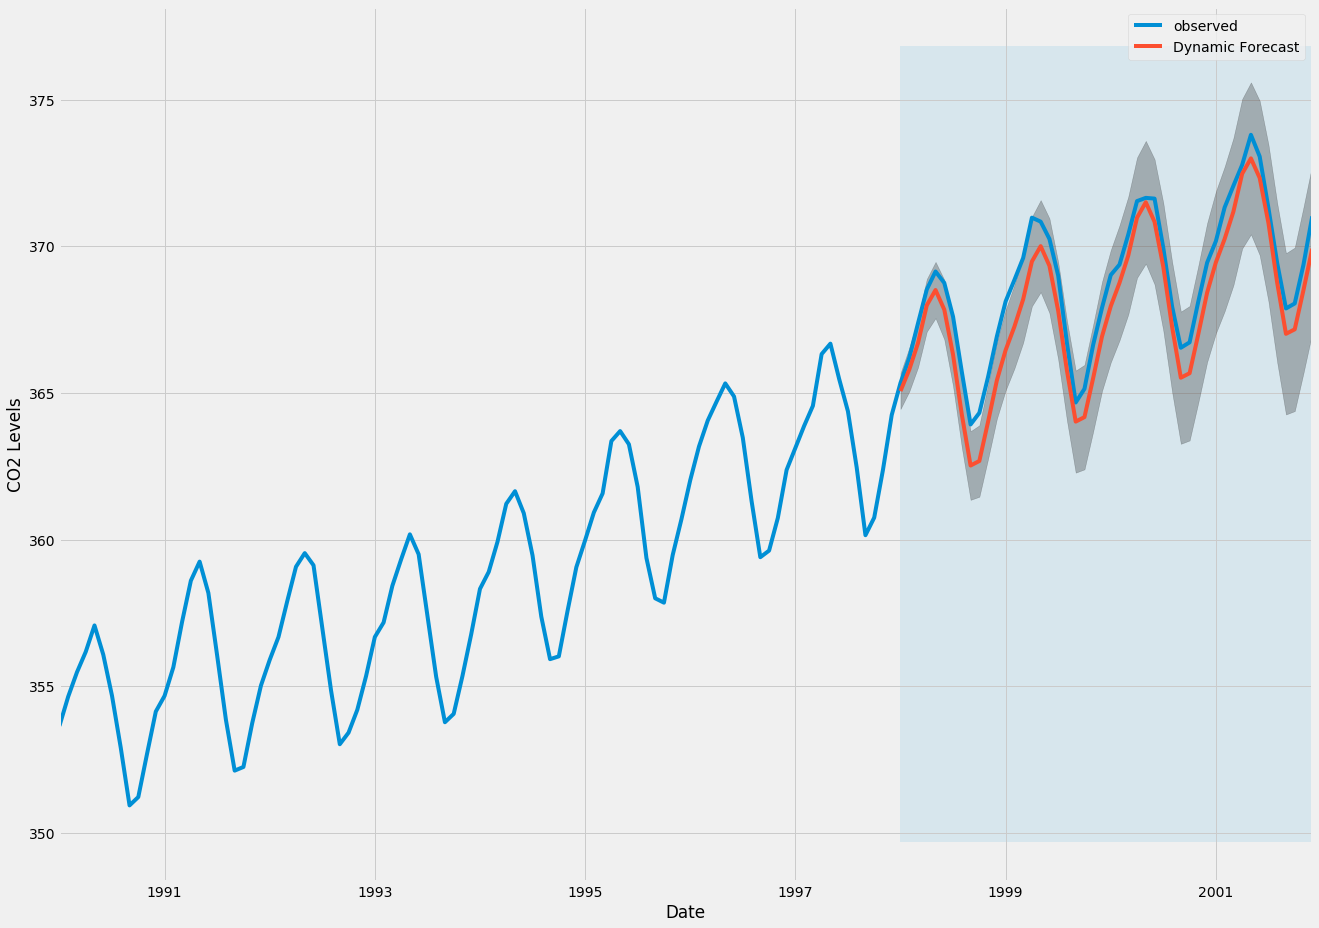

In [29]:
ax = y['1990':].plot(label = 'observed', figsize = (20, 15))
pred_dynamic.predicted_mean.plot(label = 'Dynamic Forecast', ax = ax)

ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1], alpha = .1, zorder = -1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [30]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [31]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps = 500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

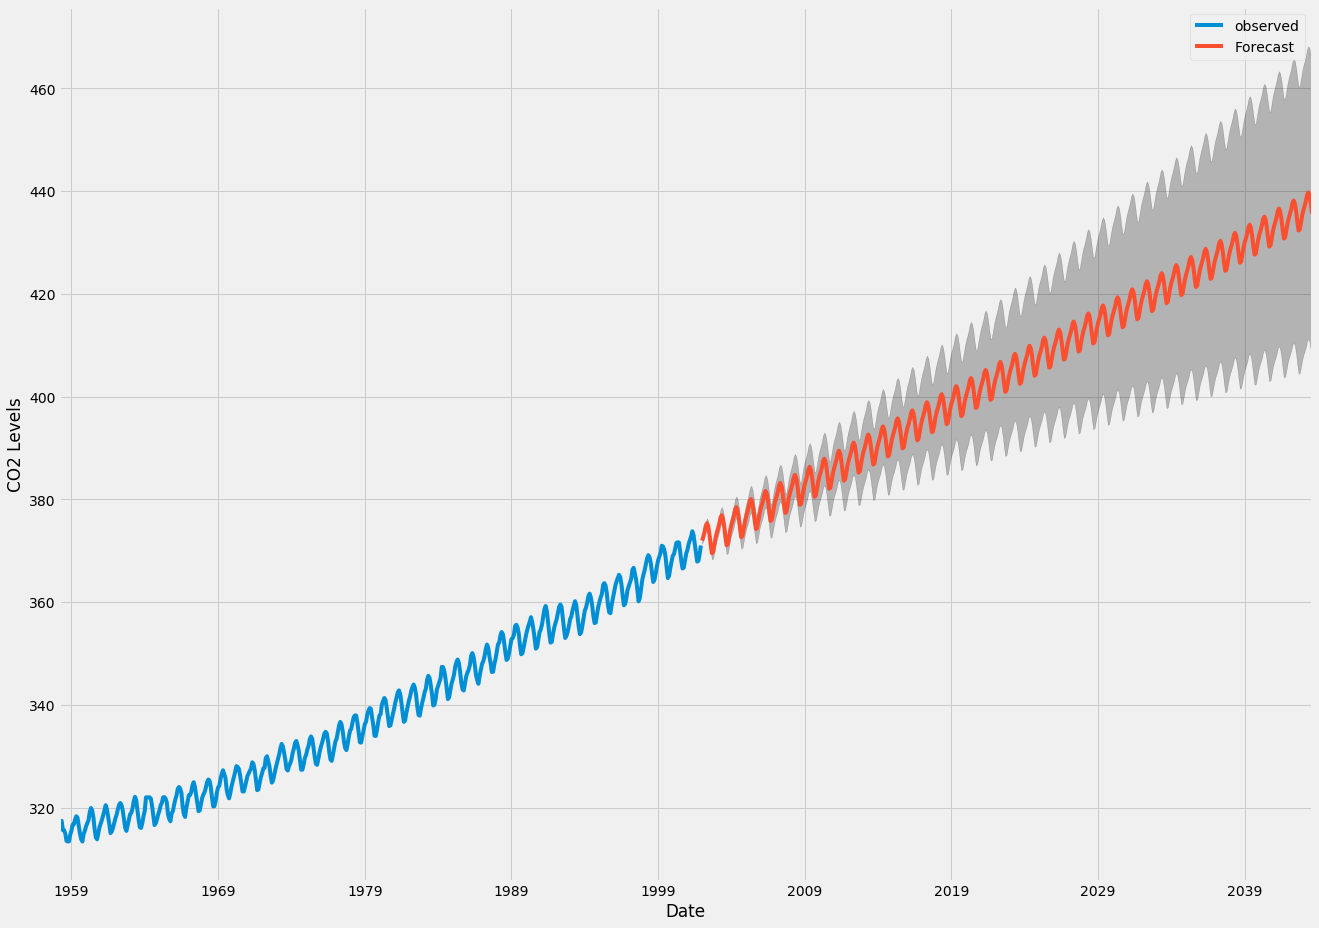

In [32]:
ax = y.plot(label = 'observed', figsize = (20, 15))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()